# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)



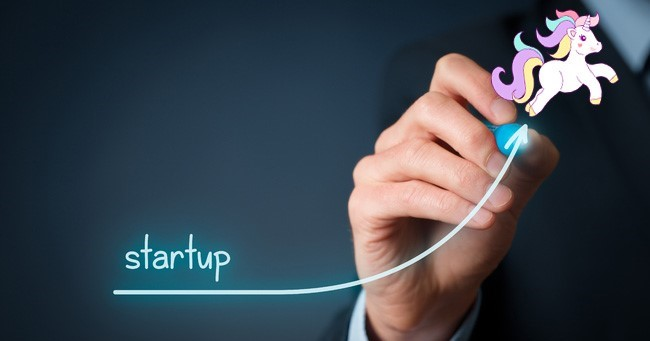

In [2]:
# Importar as libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
#ler os dados 

Base_Dados = pd.read_csv('Startups+in+2021+end.csv')

#verificando dimensões

Base_Dados.shape

# temos 936 linhas e 8 colunas 

(936, 8)

In [5]:
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [6]:
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [8]:
# Renomear

Base_Dados.rename( columns={
    'Unnamed: 0': 'Id',
    'Company': 'Empresa', 
    'Valuation ($B)': 'Valor ($)', 
    'Date Joined': 'Data de Adesao', 
    'Country': 'Pais',
    'City': 'Cidade', 
    'Industry': 'Setor', 
    'Select Investors': 'Investidores', 
}, inplace=True)

display(Base_Dados)

,Id,Empresa,Valor ($),Data de Adesao,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


In [10]:
Base_Dados.info()

# O valor  e a data ta no formato objeto, porém o valor é um número, temos que formatar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesao  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [12]:
# Sabemos que temos um total de 936 linhas e algumas delas tem valores nulos, sabemos disso por que, por exemplo, na linha Cidade, temos 921 non-null ao invés de 936.. com isso, temos que preencher esses valores nulos.

Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesao     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

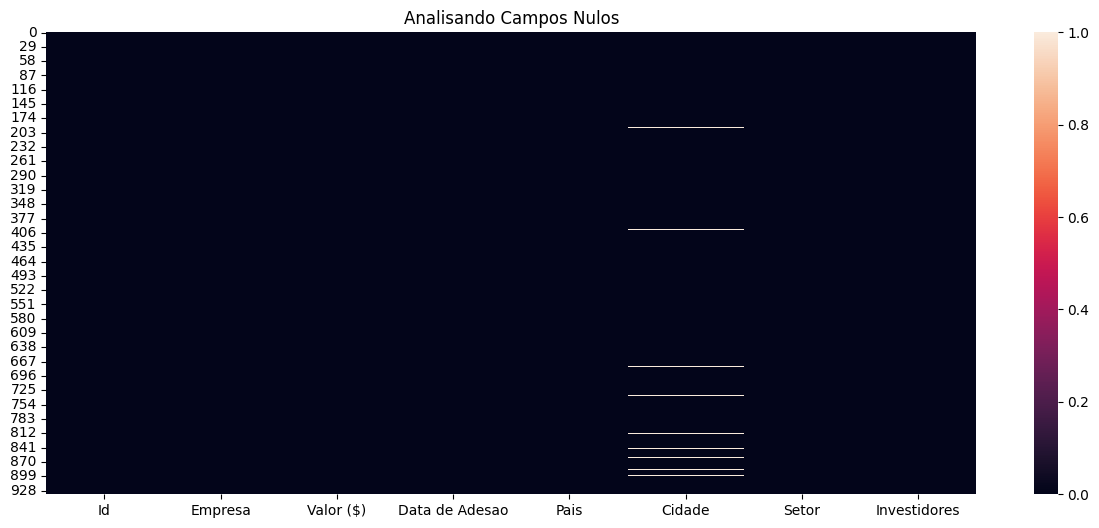

In [16]:
# Gráfica
# Análise Gráfica dos Campos nulos dentro dos dados


plt.figure(figsize=(15, 6))
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull());

In [18]:
# Campos unicos

Base_Dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesao    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [19]:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [22]:
# Valores unicos - Ranl

Base_Dados['Setor'].value_counts( normalize=True) #ver percentuamente

# nesse caso temos a soma dos vaores relacionados aos setores que mais aparecem em ordem decrescente


Setor
Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: proportion, dtype: float64

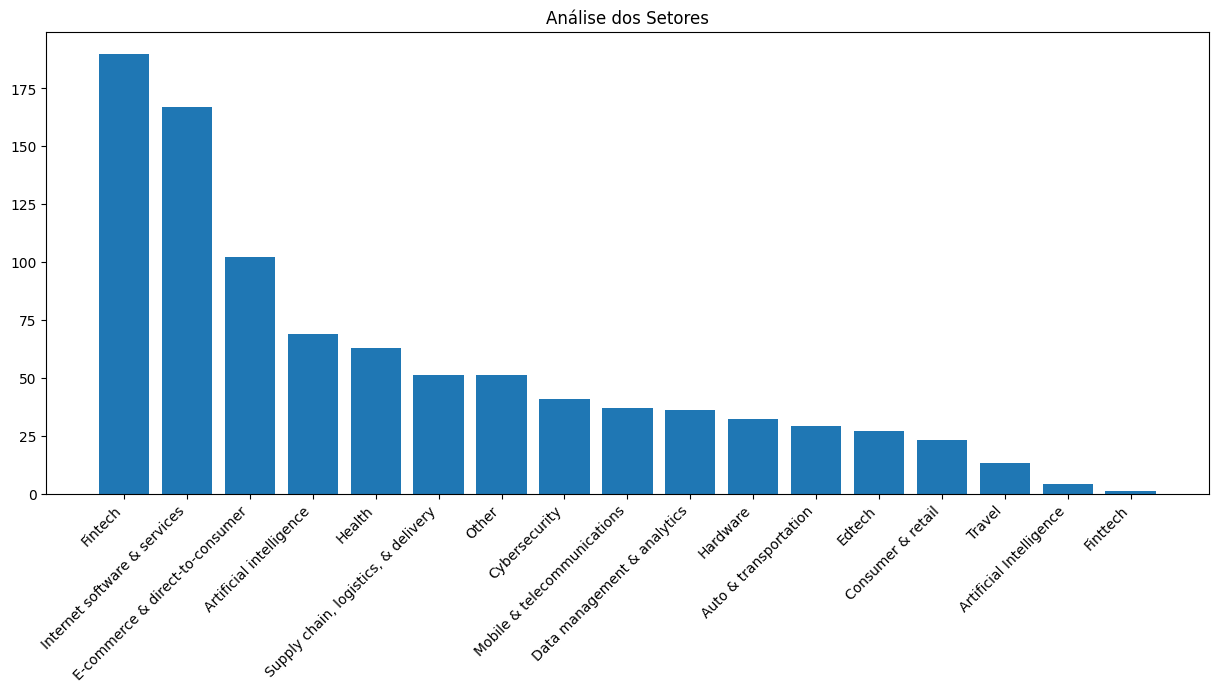

In [50]:

plt.figure( figsize=(15, 6));
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts());
plt.xticks( rotation=45, ha='right');
plt.title('Análise dos Setores');



In [40]:
# Com isso podemos analizar que as fintechs sao as que mais geram empresas unicornios no mundo.

In [96]:
analise = round(Base_Dados['Pais'].value_counts(ascending=False, normalize=True) * 100)
display(analise.head(10))
# Selecionando os 10 maiores geradotes de Empresas Unicornios do mundo

Pais
United States     51.0
China             18.0
India              5.0
United Kingdom     4.0
Germany            2.0
Israel             2.0
France             2.0
Canada             2.0
Brazil             2.0
South Korea        1.0
Name: proportion, dtype: float64

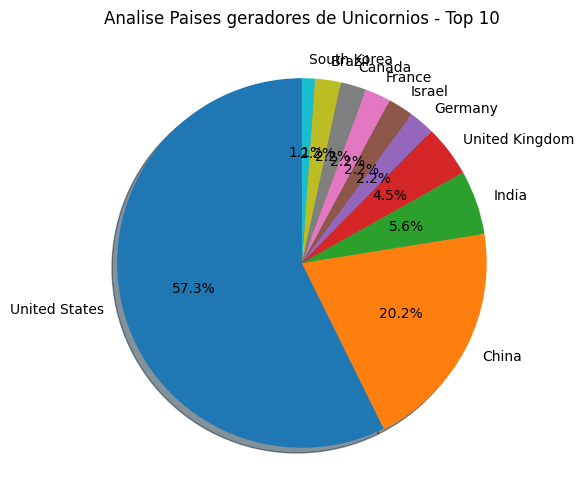

In [53]:
# Plot geral paises 
plt.figure(figsize=(15,6))
plt.title('Analise Paises geradores de Unicornios - Top 10')
plt.pie(
    analise.head(10),
    labels= analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [57]:
#Conversao para data
Base_Dados['Data de Adesao'] = pd.to_datetime(Base_Dados['Data de Adesao'])
Base_Dados['Data de Adesao'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesao, dtype: datetime64[ns]

In [60]:
# Extrair o Ano e Mes
Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesao']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesao']).year

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesao,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [68]:
# Tabela Analitica

Analise_agrupada = Base_Dados.groupby(by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['Id'].reset_index()

Analise_agrupada.loc[Analise_agrupada['Pais'] == 'Brazil']

,Pais,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [73]:
Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'].apply(lambda Linha: Linha.replace('$','')))

Base_Dados.head()

# A funcao apply permite fazer operacoes nas linhas da tabela

,Id,Empresa,Valor ($),Data de Adesao,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [81]:
# Vemos que os estados unidos lidera em valuation